In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1825

Text(0, 0.5, 'Estymowana gęstość prawdopodobieństwa')

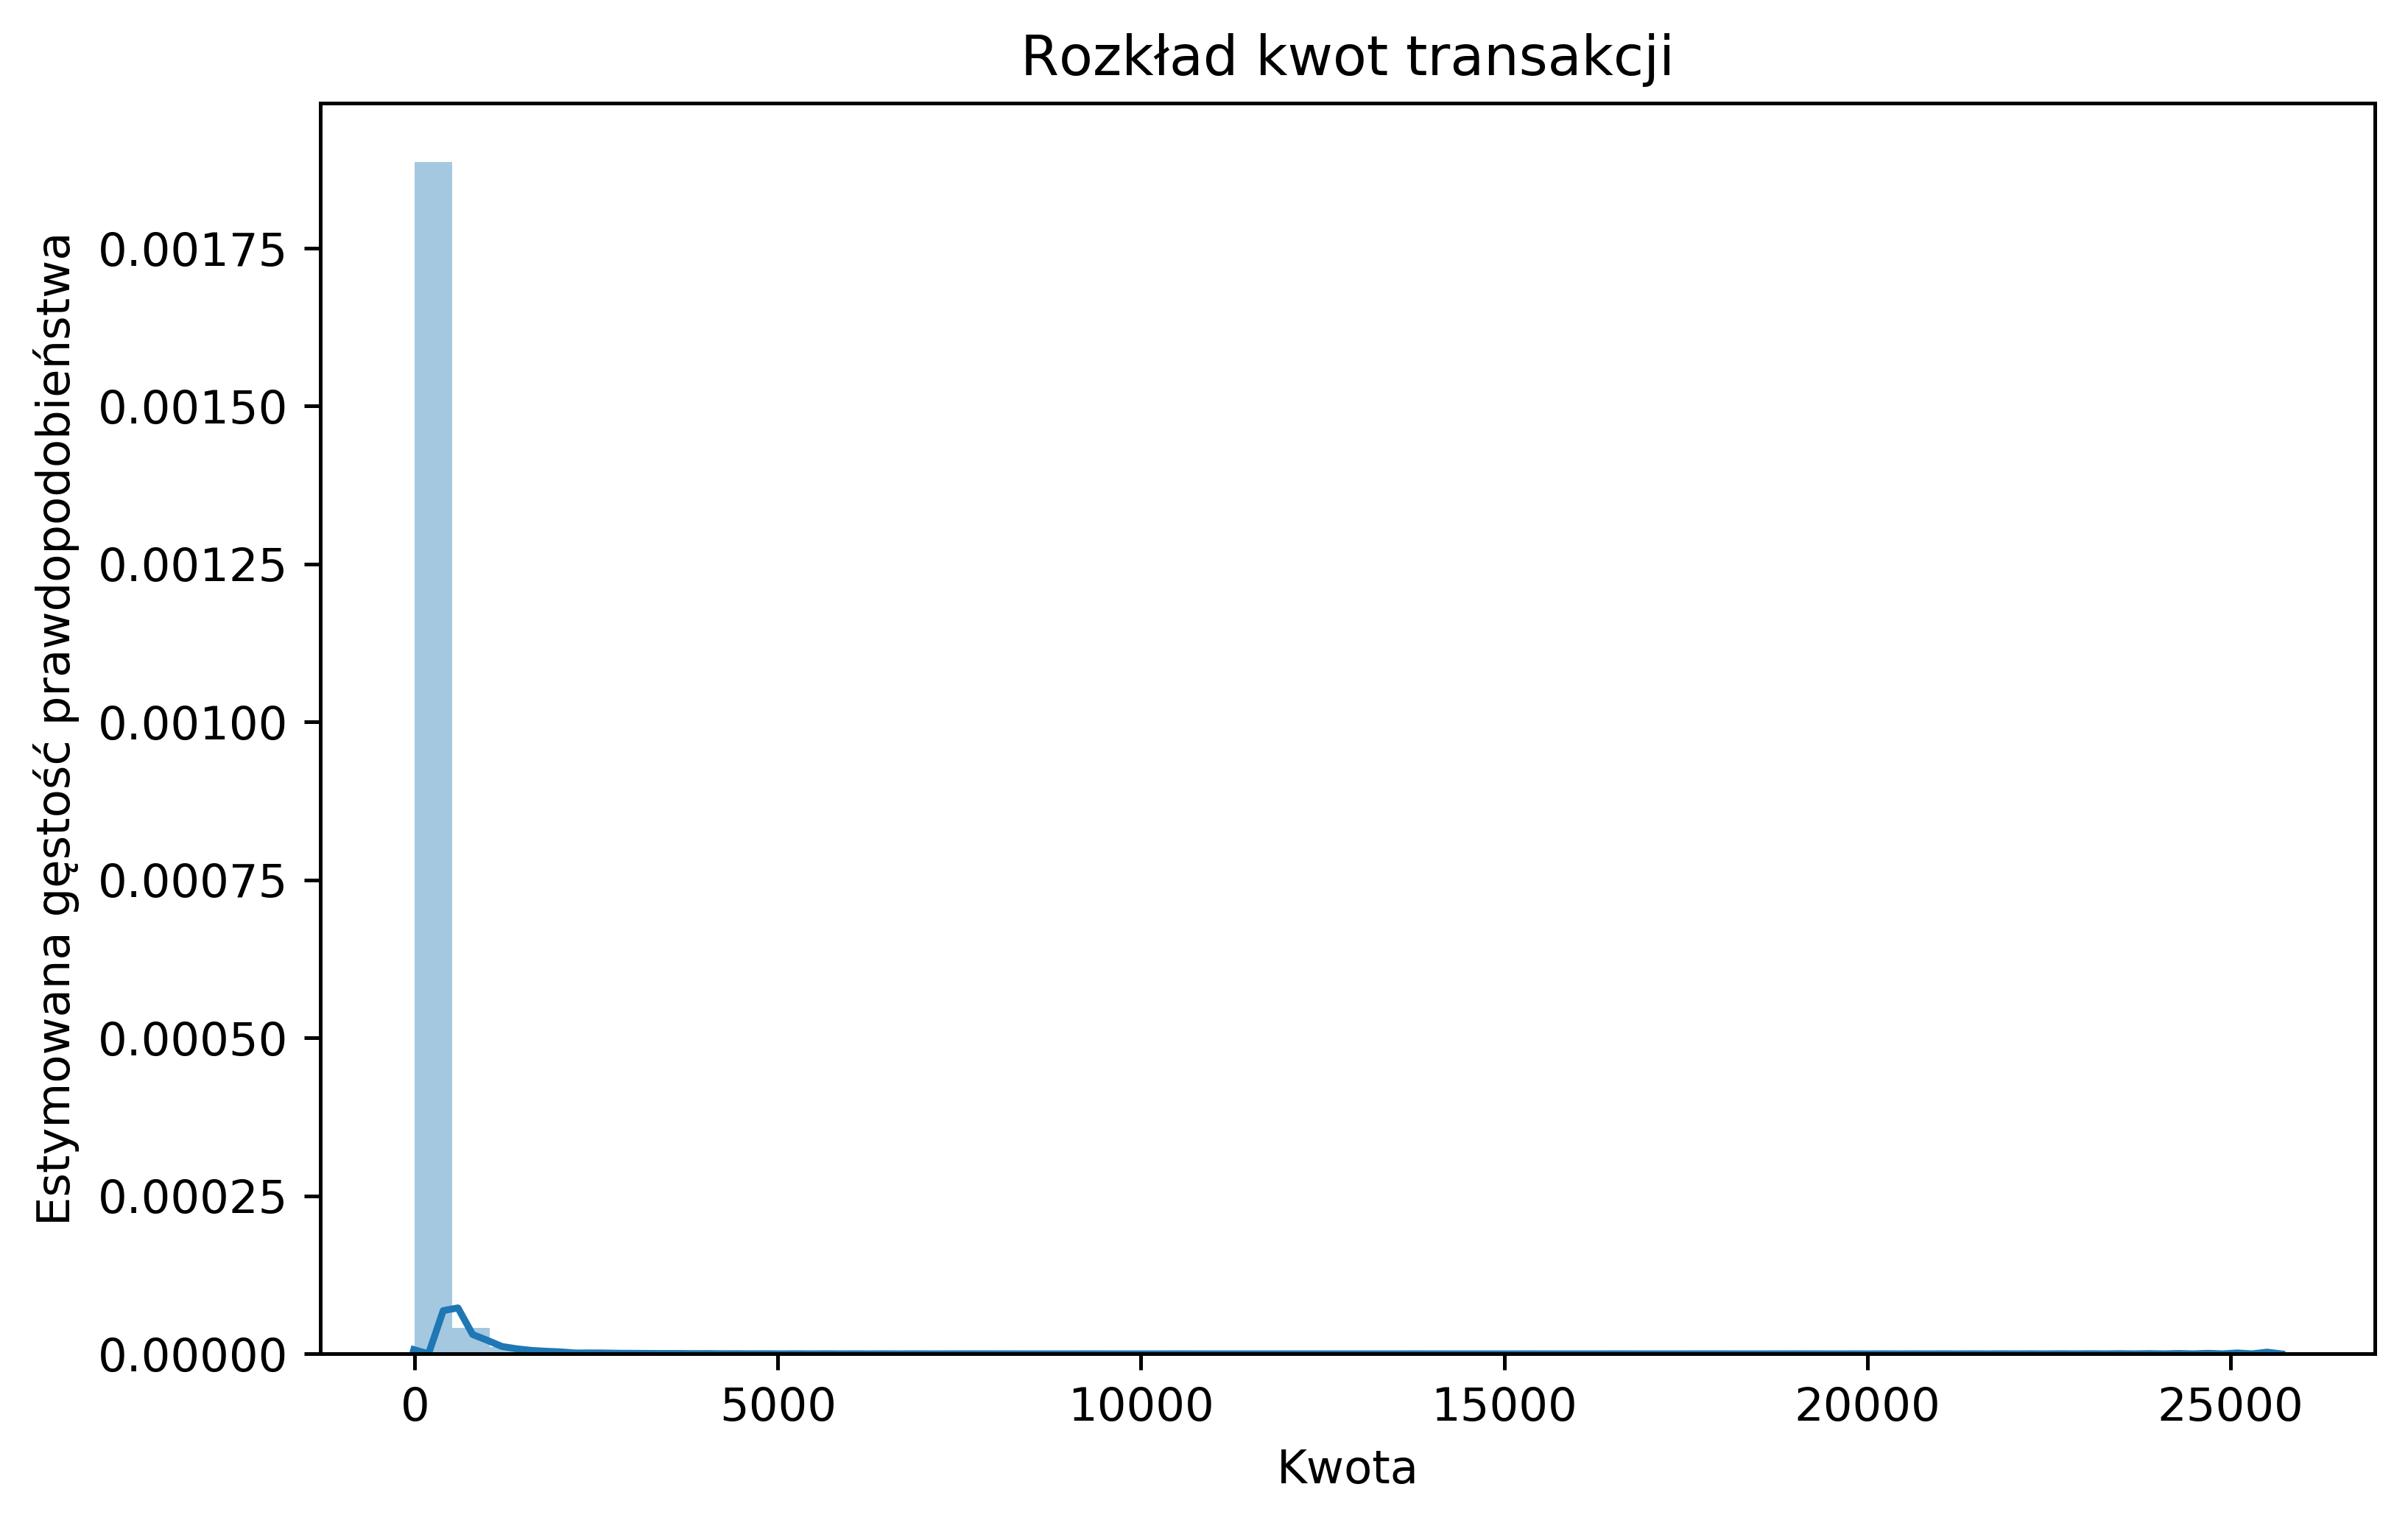

In [31]:
plt.figure(figsize = (8, 5), dpi = 450)

sns.distplot(a = df['Amount'], ax = plt.gca())

plt.title('Rozkład kwot transakcji')
plt.xlabel('Kwota')
plt.ylabel('Estymowana gęstość prawdopodobieństwa')

#plt.savefig('outputs/201_additional_plots/cross_entropy.png')

In [23]:
df[np.logical_and(df['Class'] == 1, df['Amount'] <= 1)]['Amount'].value_counts()

1.00    113
0.00     27
0.76     17
0.77     10
0.01      5
0.68      3
0.83      2
0.38      1
0.20      1
0.69      1
0.92      1
Name: Amount, dtype: int64

In [35]:
df['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
0.76        2998
10.00       2950
1.29        2892
1.79        2623
0.99        2304
20.00       2002
0.00        1825
8.99        1811
11.50       1741
4.49        1579
5.00        1569
0.77        1443
2.69        1436
25.00       1388
50.00       1341
4.99        1242
2.00        1091
30.00       1012
29.99        975
45.00        949
12.99        941
40.00        912
19.99        897
19.95        878
100.00       877
           ...  
308.57         1
443.71         1
229.42         1
242.24         1
668.87         1
293.85         1
562.28         1
1234.03        1
256.15         1
241.71         1
362.97         1
365.03         1
337.16         1
145.12         1
3783.15        1
617.89         1
508.39         1
511.61         1
167.97         1
167.03         1
133.19         1
254.07         1
108.66         1
308.82         1
154.59         1
192.63         1
218.84         1
195.52        

In [4]:
df[df['Class'] == 1]['Amount'].value_counts()

1.00       113
0.00        27
99.99       27
0.76        17
0.77        10
0.01         5
2.00         4
3.79         4
1.10         3
2.28         3
12.31        3
1.18         3
0.68         3
723.21       2
188.52       2
94.82        2
0.83         2
88.23        2
7.59         2
1.63         2
104.03       2
19.02        2
39.45        2
1.59         2
45.51        2
512.25       2
105.89       2
316.06       2
30.31        2
111.70       2
          ... 
8.90         1
444.17       1
829.41       1
254.76       1
10.70        1
720.80       1
8.54         1
7.58         1
37.93        1
426.40       1
24.90        1
30.39        1
7.57         1
23.36        1
240.77       1
209.65       1
261.22       1
1389.56      1
7.53         1
208.58       1
592.90       1
2.27         1
186.13       1
17.06        1
925.31       1
323.77       1
57.73        1
3.93         1
2.47         1
175.90       1
Name: Amount, Length: 259, dtype: int64

In [38]:
pd.cut(df[df['Class'] == 1]['Amount'], bins = [0.0, 1.0, 100.0, 200.0, np.inf]).value_counts()

(1.0, 100.0]      181
(0.0, 1.0]        154
(200.0, inf]       85
(100.0, 200.0]     45
Name: Amount, dtype: int64

In [32]:
pd.cut(df[df['Class'] == 1]['Amount'], bins = 10).value_counts()

(-2.126, 212.587]       410
(212.587, 425.174]       40
(425.174, 637.761]       17
(637.761, 850.348]       14
(1275.522, 1488.109]      4
(1062.935, 1275.522]      2
(850.348, 1062.935]       2
(1913.283, 2125.87]       1
(1700.696, 1913.283]      1
(1488.109, 1700.696]      1
Name: Amount, dtype: int64

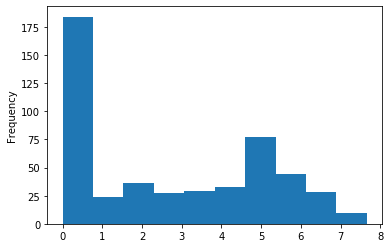

In [5]:
np.log1p(df[df['Class'] == 1]['Amount']).plot(kind = 'hist')